# Основные понятия и примеры прикладных задач

# Используемые пакеты

In [122]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !wget -q -O requirements.txt
    !pip install -q -r requirements.txt

In [123]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ирисы Фишера
Выборка взята отсюда: https://archive.ics.uci.edu/ml/datasets/iris

## Загрузка выборки

In [124]:
dataset = pd.read_csv('https://raw.githubusercontent.com/andriygav/MachineLearningSeminars/master/sem1/data/iris.csv',
                      header=None,
                      names=['длина чашелистика', 'ширина чашелистика',
                             'длина лепестка', 'ширина лепестка', 'класс'])
dataset.sample(5, random_state=0)

,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка,класс
114,5.8,2.8,5.1,2.4,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa


## Начало работы с данными
1. Определить множество объектов:
    * Определить размер выборки
    * Определить признаки, которыми описываются объекты
2. Определить множество ответов
3. Определить тип задачи машинного обучения
6. ...

### Множество объектов
В данной задачи множество объектов описывается $n=4$ признаками:
1. Длина чашелистика
2. Ширина чашелистика
3. Длина лепестка
4. Ширина лепестка

In [125]:
print('Размер выборки составляет l={} объектов.'.format(len(dataset)))

Размер выборки составляет l=150 объектов.


Все признаки являются вещественными признаками. Формально объекты $\mathbf{X}$ представляються в следующем виде:
$$\mathbf{X} \in \mathbb{R}^{l\times n},$$
где $l$ число объектов, а $n$ число признаков.

Получаем, что $\mathbf{X}$ это некоторая вещественная матрица размера $l\times n$.

### Множество ответов
В данной задаче множество ответов состоит из трех элементов:
1. Iris-virginica
2. Iris-versicolor
3. Iris-setosa

### Задача машинного обучения
В нашем случае, так как мощность множества $|\mathbf{y}|=3 \ll l=150$ получаем задачу классификации на $M=3$ класса.

## Анализ данных
Сначала проэктируем все объекты на двумерные плоскости, для упрощения анализа

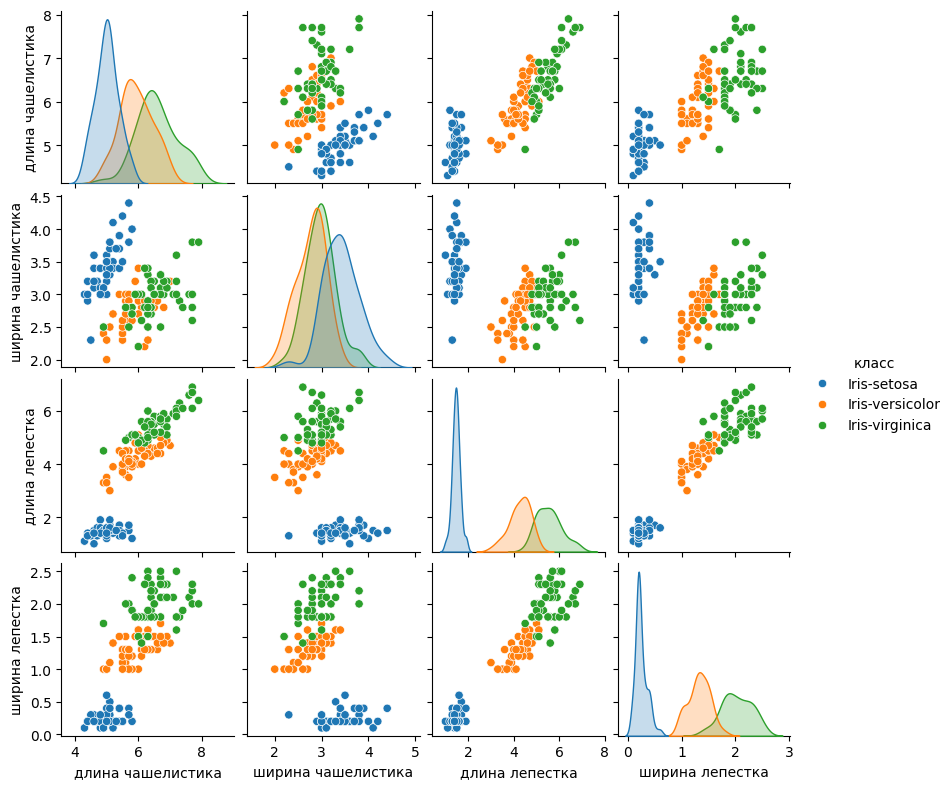

In [126]:
sns.pairplot(dataset, hue='класс', height=2)
plt.show()

Из рисунка видно, что класс синих точек (Iris-setosa) легко отделяется от двух других цветов. Оранджевые и зеленные точки отделяются не так просто в каждой из проэкций, но все равно можно провести прямую, которая отделит оранджевые точки от зеленых.

## Построение модели
### Преобразование данных
Как было сказано ранее нам требуется решить задачу классификации на 3 класса. Но для наглядноси рассмотрим бинарную классификацию (классификацию на несколько классов рассмотрим в следующей лекции).

Чтобы исходную задачу преобразовать в задачу бинарной классификации уберем из выборки все объекта класса Iris-setosa.

In [127]:
binary_dataset = dataset.drop(index=dataset.index[dataset['класс'] == 'Iris-setosa'])

Классы закодируем целыми числами $-1$ и $1$.

In [128]:
binary_dataset.loc[dataset['класс'] == 'Iris-versicolor', dataset.columns == 'класс'] = -1
binary_dataset.loc[dataset['класс'] == 'Iris-virginica', dataset.columns == 'класс'] = 1

Получаем задачу бинарной классификации.

### Модель алгоритмов

Модель алгоритмов $\mathfrak{F}$ в машинном обучении это некоторое множество функций, которые действуют из множества объектов в множество ответов, в нашем случае:
$$\mathfrak{F} = \{f| f: \mathbb{R}^n \to \{-1, 1\}, \text{еще какие-то ограничения}\},$$
обычно $\mathfrak{F}$ это некоторое параметрическое семество функций, тоесть разные функции $f$ отличаются друг от друга только каким-то параметром. Простым примером параметрическим семейством функций для задачи бинарной классификации является семейство линейный классификатор:
$$\mathfrak{F}_{bcl} = \left\{f\bigr(\theta, \mathbf{x}\bigr)=\text{sign}\bigr(\theta^{\mathsf{T}}\mathbf{x}\bigr)\bigr| \theta \in \mathbb{R}^{n} \right\}.$$


### Функция потерь

Машиное обучение это всегда выбор функции из множества $\mathfrak{F}$. Чтобы выбрать функцию, нужен некоторый критерий по которому она выбирается, то есть нужно упоррядочить все функции от худшей к лучшей. Для этого построем функционал $\mathcal{L}$, который каждой функции $f \in \mathfrak{F}$ ставит в соответствии число из $\mathbb{R}_+$. В машинном обучении обычно функционал качества водиться как некоторая ошибка на выборке. В общем виде функционал качества можно представить в следующем виде:
$$\mathcal{L}\bigr(f, \mathbf{X}, \mathbf{y}\bigr) = \sum_{i=1}^l\mathcal{q}\bigr(f, \mathbf{x}_i, y_i\bigr),$$
где $q$ некоторая функция ошибки на некотором объекте $\mathbf{x}$. Функционал качества $\mathcal{L}$ называется эмперическим риском.

### Оптимизационная задача

Далее нужно поставить задачу оптимизации для выбора $f \in \mathfrak{F}$. Здесь все просто, просто минимизируем эмперический риск:
$$\hat{f} = \arg \min_{f \in \mathfrak{F}} \mathcal{L}\bigr(f, \mathbf{X}, \mathbf{y}\bigr).$$

Важно! В результе функция $\hat{f}$ зависит от выборки $\left(\mathbf{X}, \mathbf{y}\right)$, то есть для разных наборов данных оптимальная функция будет различная.

Вернемся к нашей задаче. В нашем случае функционал качества будет иметь следующий вид:
$$\mathcal{L}\bigr(\theta, \mathbf{X}, \mathbf{y}\bigr) = \sum_{i=1}^l\bigr[f\bigr(\theta, \mathbf{x}_i\bigr) \not= y_i\bigr],$$
и оптимизационная задача переписывается в виде:
$$\hat{\theta} = \arg \min_{\theta \in \mathbb{R}^n} \sum_{i=1}^l\bigr[f\bigr(\theta, \mathbf{x}_i\bigr) \not= y_i\bigr].$$

И на самом деле в дальнейшем будем решать иммено такие задачи, на поиск оптимального параметра. Само решение задачи линейной бинарной классификации будет на следующей лекции. Сейчас используемся библиотеками для решения данной задачи. Далее в примере будет найден параметр $\hat{\theta}$ не как решение непосредственно этой оптимизационной задачи, а немного измененной, но об этом позже в следующей лекции.

### Поиск оптимального вектора параметров
Перейдем к двум матрицам:
1. Матрице объектов $\mathbf{X} \in \mathbb{R}^{l\times (n+1)}$
2. Вектору ответов $\mathbf{y} \in \{-1,1\}^l$

Заметим, что объекты мы погрузили в пространство более большой размерности, добавив еще один признак, который у всех объектов будет равен $1$.

In [129]:
X = binary_dataset.iloc[:, binary_dataset.columns != 'класс'].values
y = binary_dataset.iloc[:, binary_dataset.columns == 'класс'].values.reshape(-1)
X = np.array(np.hstack([X, np.ones([len(X), 1])]), dtype=np.float64)
y = np.array(y, dtype=np.int64)

In [130]:
model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, y)

Получаем вектор оптимальных параметров $\hat{\theta}$

In [131]:
model.coef_

array([[-3.94857799e-01, -5.12236925e-01,  2.93150207e+00,
         2.41616121e+00, -1.17463494e-03]])

Загрузите файл winequality-red.csv (с помощью pd.read_csv).

Последний столбец отвечает за качество вина. Будем считать, что хорошее вино начинается с цифры 7 и выше. 
Остальное вино будем счиатать некачественным.

Сделайте классификацию вина по данному датасету. Два класса "Хорошее" и "Не качественное". 
Результатом будем считать уравнение гиперповерхности на гиперпространстве параметров, отделяющее один класс от другого. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('winequality-red.csv', sep=',')
print("Колонки:", df.columns.tolist())


# Бинаризация
df['quality'] = np.where(df['quality'] >= 7, 1, 0)
print("\nРаспределение классов:")
print(df['quality'].value_counts())

# X и y
X = df.drop('quality', axis=1)
y = df['quality']

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Модель
model = LogisticRegression(max_iter=5000, random_state=42, class_weight='balanced')
model.fit(X_scaled, y)

# Уравнение
coefficients = model.coef_[0]
intercept = model.intercept_[0]
features = df.drop('quality', axis=1).columns

equation_terms = [f"{coef:.4f}*{feature}" for coef, feature in zip(coefficients, features)]
equation = " + ".join(equation_terms) + f" + {intercept:.4f} = 0"

print("\nУравнение гиперплоскости:")
print(equation)

# Средние значения по классам как примеры
X_bad_mean = np.mean(X_scaled[y == 0], axis=0).reshape(1, -1)  # Среднее для класса 0
X_good_mean = np.mean(X_scaled[y == 1], axis=0).reshape(1, -1)  # Среднее для класса 1

bad_value = model.decision_function(X_bad_mean)[0]
good_value = model.decision_function(X_good_mean)[0]

print("\nЗначение для 'Плохого' вина (среднее):", bad_value)
print("Значение для 'Хорошего' вина (среднее):", good_value)
print("Разные знаки:", np.sign(bad_value) != np.sign(good_value))

# Проверка предсказаний
bad_pred = model.predict(X_bad_mean)
good_pred = model.predict(X_good_mean)
print("Предсказание для 'Плохого' вина:", bad_pred[0])
print("Предсказание для 'Хорошего' вина:", good_pred[0])

# Метрики
y_pred = model.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

print("\nМетрики:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Колонки: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Распределение классов:
quality
0    1382
1     217
Name: count, dtype: int64

Уравнение гиперплоскости:
0.5636*fixed acidity + -0.4801*volatile acidity + 0.0033*citric acid + 0.3851*residual sugar + -0.3756*chlorides + 0.1219*free sulfur dioxide + -0.5065*total sulfur dioxide + -0.4856*density + 0.0192*pH + 0.6890*sulphates + 0.9624*alcohol + -1.0454 = 0

Значение для 'Плохого' вина (среднее): -1.4085995155447488
Значение для 'Хорошего' вина (среднее): 1.2678008196110933
Разные знаки: True
Предсказание для 'Плохого' вина: 0
Предсказание для 'Хорошего' вина: 1

Метрики:
Accuracy: 0.7880
Precision: 0.3729
Recall: 0.8249
